In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### import all library

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.util import img_as_float64
from skimage.transform import  resize
from skimage.color import rgb2gray


from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### All Constant

In [3]:
rgb2yuv = np.array([[0.299, 0.587, 0.114],
                 [-0.14713, -0.28886, 0.436],
                 [0.615, -0.51499, -0.10001]]).T

yuv2rgb = np.array([[1, 0, 1.13983],
                 [1, -0.39465, -.58060],
                 [1, 2.03211, 0]]).T

### image read

In [4]:
def read_image(path):
    imr=imread(path)
    #print(imr.shape)
    newsize = (300, 400)
    image_resized = resize(imr, (newsize),anti_aliasing=True)
    #print(image_resized.shape)
    img = img_as_float64(image_resized)
    #plt.imshow(img)
    return img

In [5]:
directory=r'/content/drive/MyDrive/Colab Notebooks/4_3_image_colorization/Train_dataset'
list=os.listdir(directory)
print(list)
X = []
U_CNN = []
V_CNN = []
R = []
G = []
B = []
total_data = 0

for path in list:
    path = r'/content/drive/MyDrive/Colab Notebooks/4_3_image_colorization/Train_dataset/'+path+''
    print(path)
    img = read_image(path)
    n = len(img.shape)
    if(n<3):
      continue
   
    c = img[:,:,0]
    c.flatten()
    c = np.average(c)
    R.append(c)

    c = img[:,:,1]
    c.flatten()
    c = np.average(c)
    G.append(c)

    c = img[:,:,2]
    c.flatten()
    c = np.average(c)
    B.append(c)

    total_data = total_data + 1
    print(total_data)
    
    yuv = np.dot(img,rgb2yuv)
    Y = yuv[:,:,0]
    U = yuv[:,:,1]
    V = yuv[:,:,2]

    #Y = np.expand_dims(Y, axis=0)
    X.append(Y)
    U = U.flatten()
    V = V.flatten()
    U_CNN.append(U)
    V_CNN.append(V)
    #print(X.shape)

R = np.array(R)
G = np.array(G)
B = np.array(B)

X = np.array(X)
U_CNN = np.array(U_CNN)
V_CNN = np.array(V_CNN)

['1 (130).jpg', '1 (131).jpg', '1 (132).jpg', '1 (135).jpg', '1 (134).jpg', '1 (137).jpg', '1 (136).jpg', '1 (133).jpg', '1 (139).jpg', '1 (143).jpg', '1 (138).jpg', '1 (140).jpg', '1 (141).jpg', '1 (142).jpg', '1 (150).jpg', '1 (148).jpg', '1 (153).jpg', '1 (154).jpg', '1 (151).jpg', '1 (152).jpg', '1 (144).jpg', '1 (145).jpg', '1 (149).jpg', '1 (146).jpg', '1 (147).jpg', '1 (189).jpg', '1 (176).jpg', '1 (184).jpg', '1 (179).jpg', '1 (182).jpg', '1 (170).jpg', '1 (173).jpg', '1 (163).jpg', '1 (167).jpg', '1 (164).jpg', '1 (192).jpg', '1 (187).jpg', '1 (166).jpg', '1 (188).jpg', '1 (191).jpg', '1 (174).jpg', '1 (185).jpg', '1 (175).jpg', '1 (180).jpg', '1 (168).jpg', '1 (193).jpg', '1 (190).jpg', '1 (157).jpg', '1 (186).jpg', '1 (181).jpg', '1 (156).jpg', '1 (169).jpg', '1 (171).jpg', '1 (172).jpg', '1 (160).jpg', '1 (194).jpg', '1 (159).jpg', '1 (162).jpg', '1 (196).jpg', '1 (178).jpg', '1 (158).jpg', '1 (195).jpg', '1 (177).jpg', '1 (161).jpg', '1 (155).jpg', '1 (183).jpg', '1 (165).

In [6]:
print(X.shape)
print(U_CNN.shape)
print(V_CNN.shape)

(701, 300, 400)
(701, 120000)
(701, 120000)


**Plot the data Color variety**

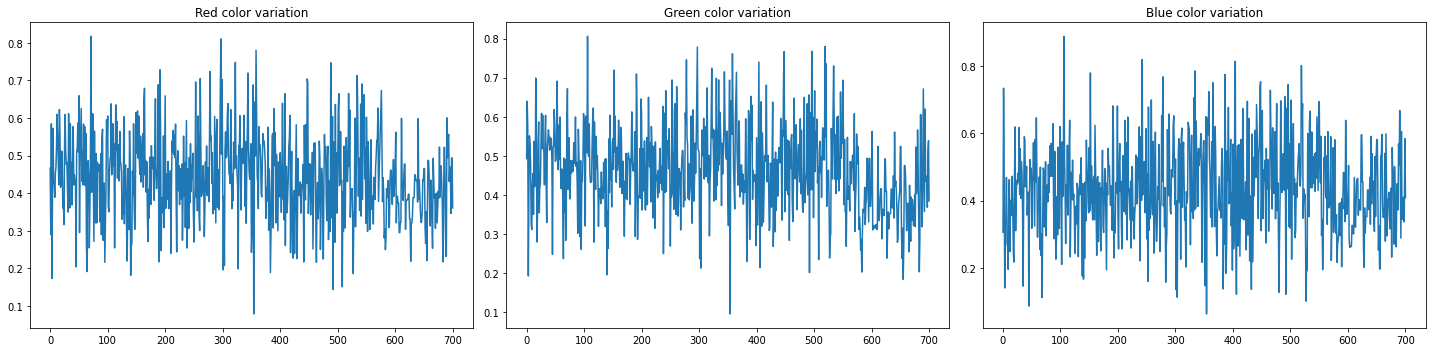

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
ax = axes.ravel()
x = np.arange(0,len(R),1)

ax[0].plot(x,R)    
ax[0].set_title("Red color variation")

ax[1].plot(x,G)    
ax[1].set_title("Green color variation")

ax[2].plot(x,B)    
ax[2].set_title("Blue color variation")

fig.tight_layout()

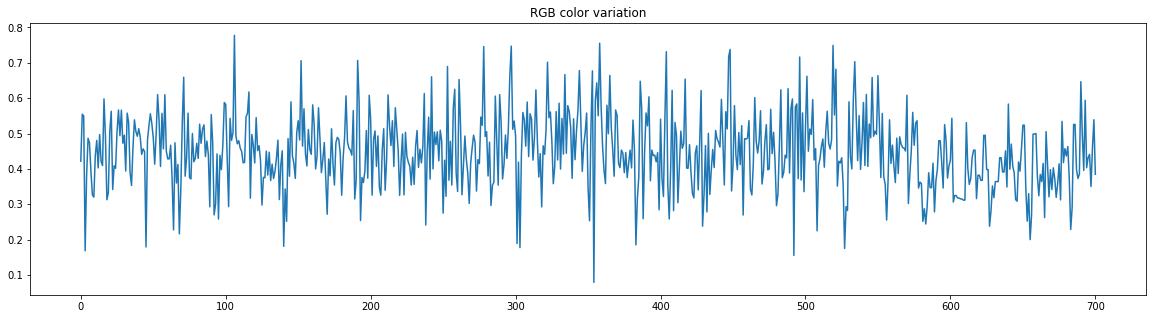

In [8]:
RGB = np.zeros(len(R))
for i in range(len(R)):
  RGB[i] = (R[i]+G[i]+B[i])/3.0

x = np.arange(0,len(R),1)
plt.figure(figsize=(20,5))
plt.plot(x,RGB)    
plt.title("RGB color variation")
plt.show()

In [9]:
model_U = Sequential()


model_U.add(Conv1D(32,3, activation="relu", input_shape=(300, 400)))
model_U.add(Conv1D(64,3, activation="relu"))
model_U.add(Conv1D(128,3, activation="relu"))

model_U.add(Flatten())
model_U.add(Dense(256, activation="relu"))
model_U.add(Dense(512, activation="relu"))
model_U.add(Dense(1024, activation="relu"))
model_U.add(Dense(120000))

model_U.compile(loss="mse", optimizer="adam")
 
model_U.summary()
print(X.shape,U_CNN.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 298, 32)           38432     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 64)           6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 294, 128)          24704     
_________________________________________________________________
flatten (Flatten)            (None, 37632)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               9634048   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

In [10]:
model_U.fit(X, U_CNN, batch_size=10,epochs=100, verbose=1)
model_U.save('save_model_U.h5')

Epoch 1/100
71/71 [==============================] - 10s 36ms/step - loss: 0.0057
Epoch 2/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0054
Epoch 3/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0054
Epoch 4/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0053
Epoch 5/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0054
Epoch 6/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0052
Epoch 7/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0057
Epoch 8/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0051
Epoch 9/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0052
Epoch 10/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0053
Epoch 11/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0053
Epoch 12/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0051
Epoch 13/100
71/71 [====

In [11]:
#from google.colab import files
#files.download('save_model_U.h5')

In [12]:
model_V = Sequential()


model_V.add(Conv1D(32,3, activation="relu", input_shape=(300, 400)))
model_V.add(Conv1D(64,3, activation="relu"))
model_V.add(Conv1D(128,3, activation="relu"))

model_V.add(Flatten())
model_V.add(Dense(256, activation="relu"))
model_V.add(Dense(512, activation="relu"))
model_V.add(Dense(1024, activation="relu"))
model_V.add(Dense(120000))

model_V.compile(loss="mse", optimizer="adam")
 
model_V.summary()
print(X.shape,V_CNN.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 298, 32)           38432     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 296, 64)           6208      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 294, 128)          24704     
_________________________________________________________________
flatten_1 (Flatten)          (None, 37632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               9634048   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [13]:
model_V.fit(X, V_CNN, batch_size=10,epochs=100, verbose=1)
model_V.save('save_model_V.h5')

Epoch 1/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0080
Epoch 2/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0071
Epoch 3/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0074
Epoch 4/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0073
Epoch 5/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0068
Epoch 6/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0073
Epoch 7/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0068
Epoch 8/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0068
Epoch 9/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0067
Epoch 10/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0069
Epoch 11/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0070
Epoch 12/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0066
Epoch 13/100
71/71 [=====

In [14]:
def predict_output(img,channel):
  gray_img = rgb2gray(img)
  print(gray_img.shape)
  channel_3_img = np.zeros_like(img)
  channel_3_img[:,:,0] = gray_img
  channel_3_img[:,:,1] = gray_img
  channel_3_img[:,:,2] = gray_img
  yuv = np.dot(channel_3_img,rgb2yuv)

  P = yuv[:,:,0]
  P = np.expand_dims(P, axis=0)
  print(P.shape)
  #U.flatten()
  if channel==1:
    P = model_U.predict(P)
  else:
    P = model_V.predict(P)
  #print(preds.shape)
  P = np.reshape(P, (-1, 400))
  return yuv[:,:,0],P

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


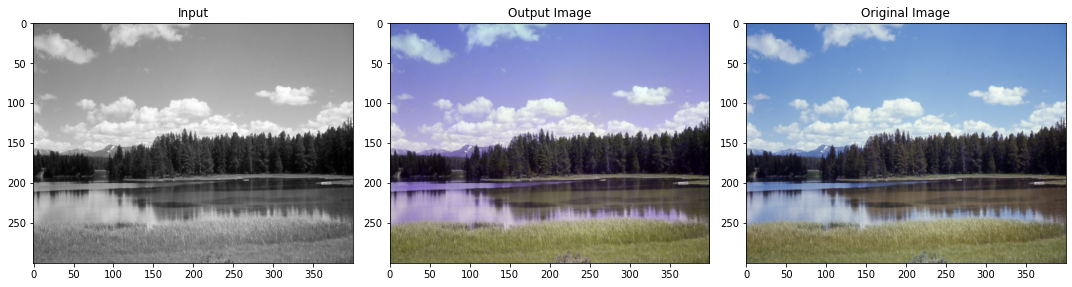

In [58]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(48).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


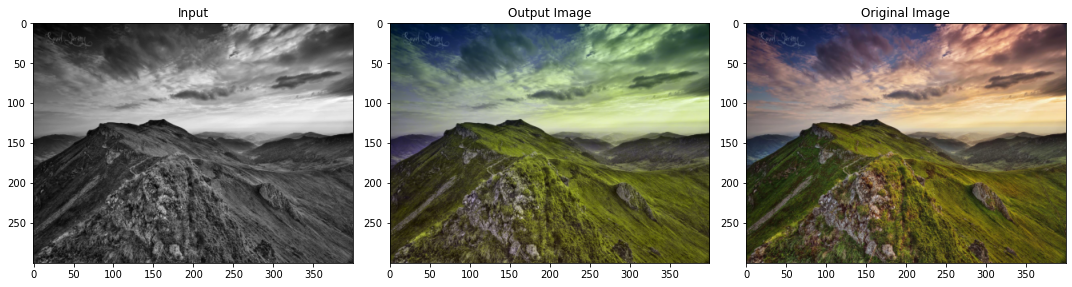

In [19]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(38).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


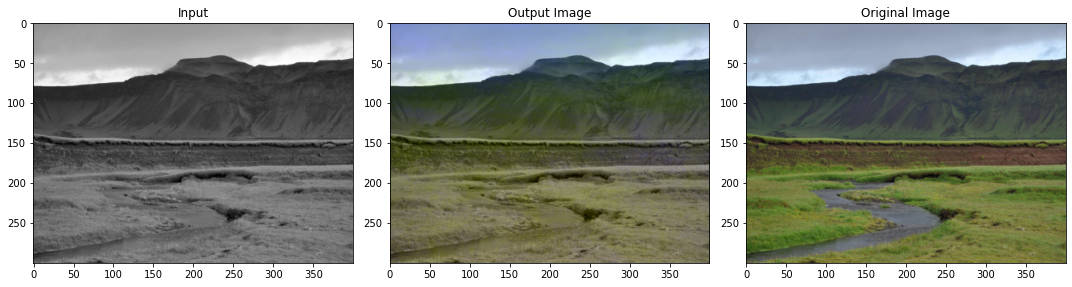

In [16]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(31).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


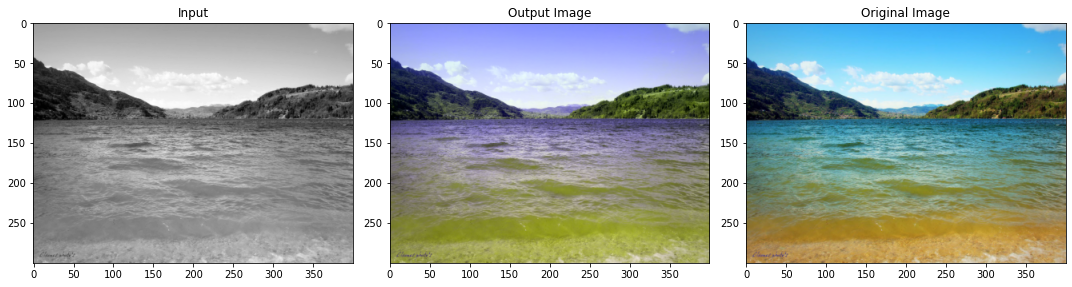

In [17]:
path =  r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(37).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


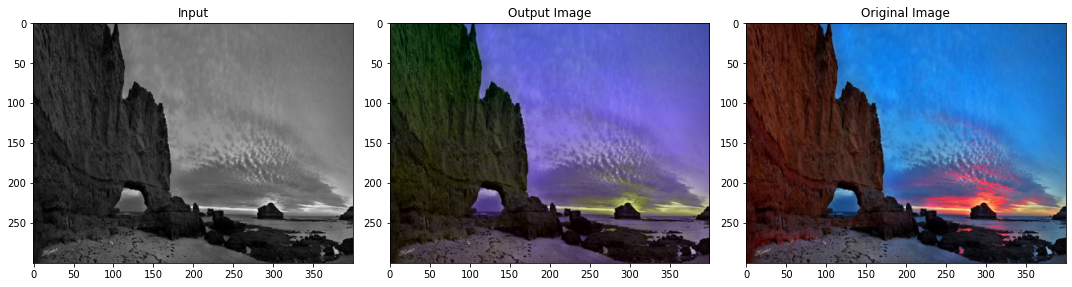

In [18]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(53).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


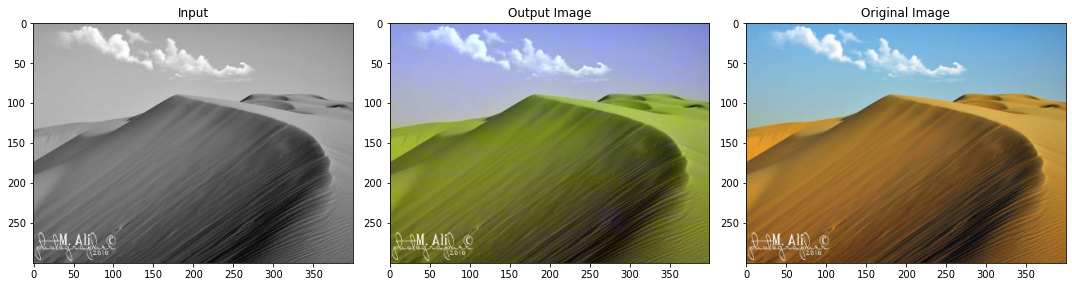

In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(8).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


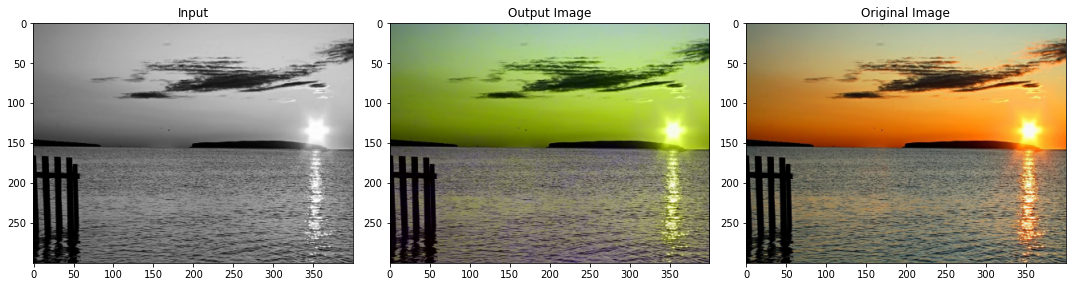

In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(5).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


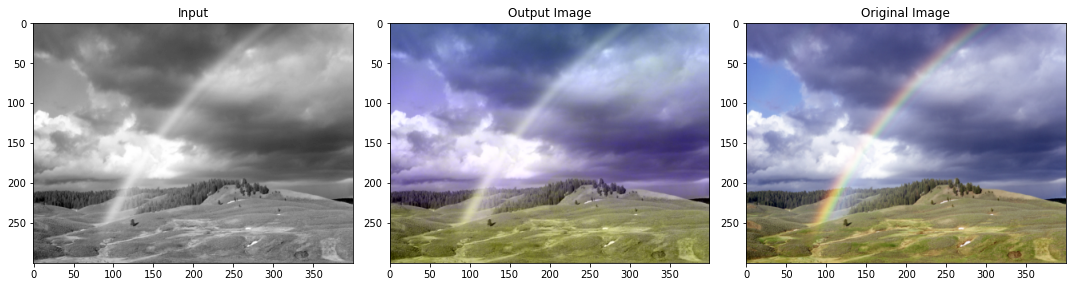

In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(50).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


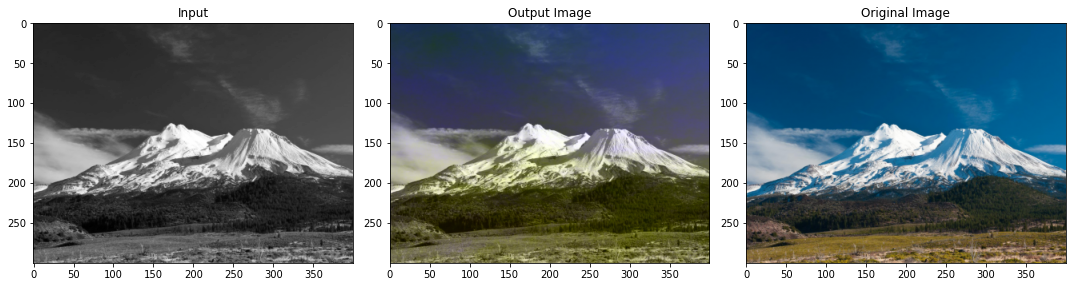

In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(29).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


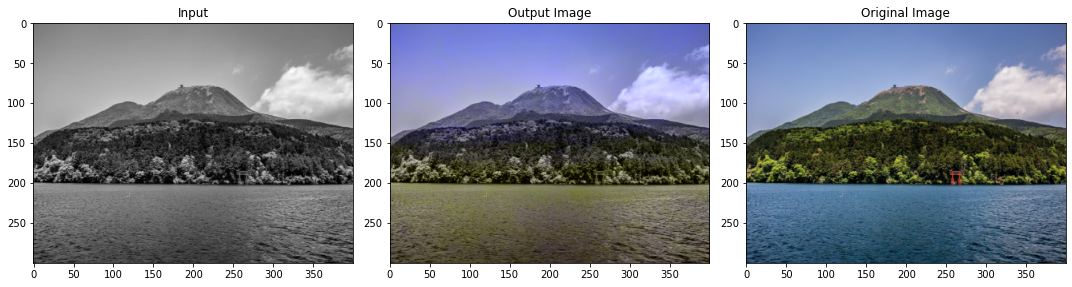

In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(28).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


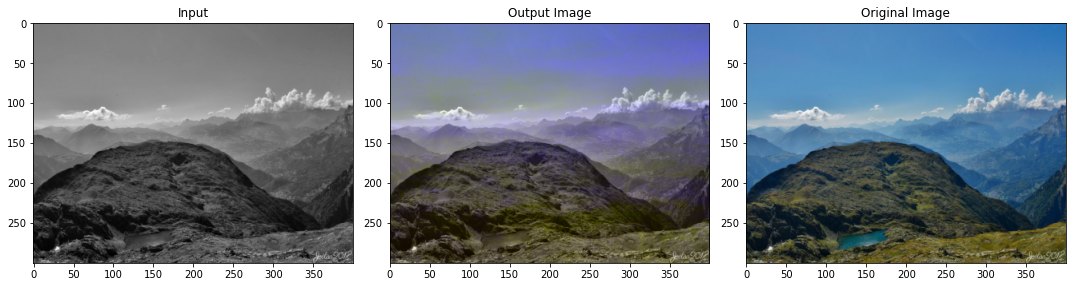

In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/Image Colorization/test/(18).jpg'
img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()

(300, 400)
(1, 300, 400)
(300, 400)
(1, 300, 400)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


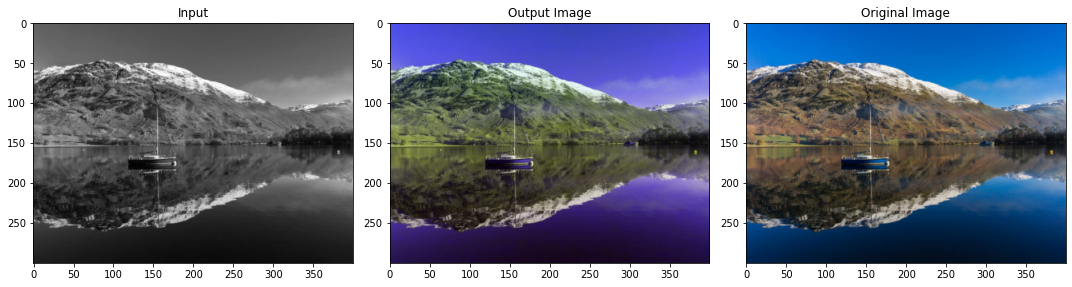

In [15]:
path = r'/content/drive/MyDrive/Colab Notebooks/Image Colorization/test/(52).jpg'

img = read_image(path)
Y,U_P = predict_output(img,1)
Y,V_P = predict_output(img,2)

yuv[:,:,0] = Y
yuv[:,:,1] = U_P
yuv[:,:,2] = V_P
rgb = np.dot(yuv, yuv2rgb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()
gray_img = rgb2gray(img)
ax[0].imshow(gray_img,  cmap=plt.cm.gray)
ax[0].set_title("Input")

ax[1].imshow(rgb)
ax[1].set_title("Output Image")

ax[2].imshow(img)
ax[2].set_title("Original Image")

fig.tight_layout()